In [1]:
pip install ultralytics opencv-python


Note: you may need to restart the kernel to use updated packages.


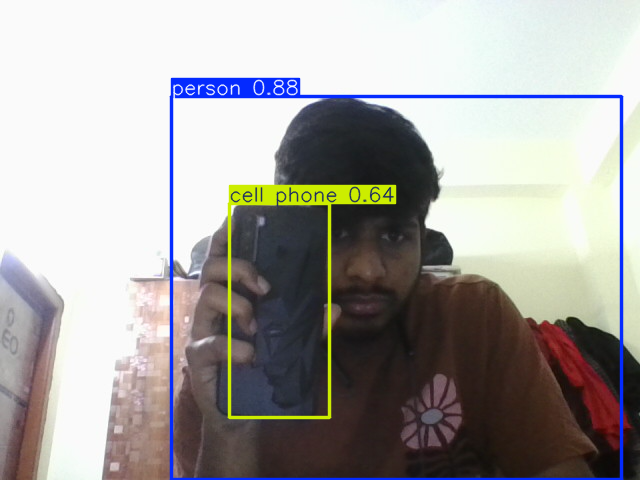

In [ ]:
import os
import cv2
from ultralytics import YOLO
import time
from IPython.display import display, clear_output
from PIL import Image

# Disable file validation for debugger
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Nano version for speed

# Unfreeze all layers for fine-tuning
for param in model.model.parameters():
    param.requires_grad = True

print("✅ All layers have been unfrozen for fine-tuning.")

# Open default camera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Could not open camera.")
    cap.release()
else:
    print("📷 Camera opened successfully.")

# Allow camera to warm up
time.sleep(2)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame.")
            break

        # Run YOLOv8 detection
        results = model(frame)

        # Draw bounding boxes
        annotated_frame = results[0].plot()

        # Convert frame for Jupyter display
        img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)

        # Display in Jupyter Notebook
        clear_output(wait=True)
        display(img_pil)

        # Break if needed (manually interrupt in Jupyter)
except KeyboardInterrupt:
    print("🛑 Stopped by user.")

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()
